In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("/content/House_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7984b81f4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7984b7ff6cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7984b7ff4370>],
 'medians': [<matplotlib.lines.Line2D at 0x7984b7bc6290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7984b7bc76a0>],
 'means': []}

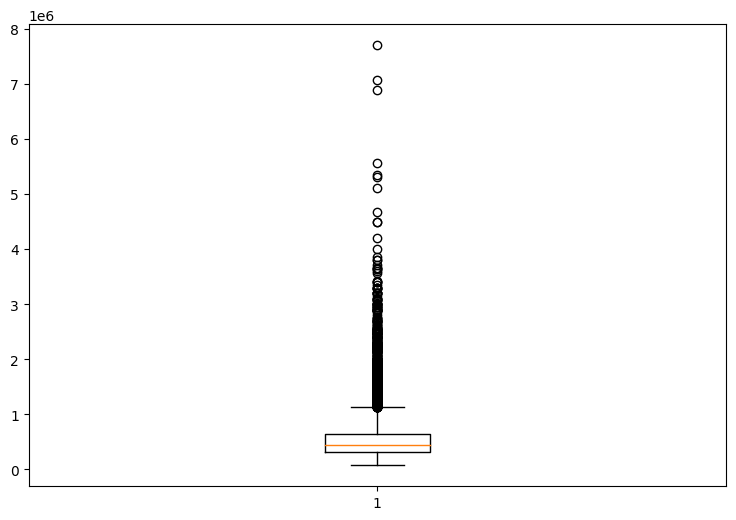

In [7]:
fig=plt.figure(5,figsize=(9,6))
ax=fig.add_subplot(111)
ax.boxplot(df["price"])

In [8]:
df.drop(["id","date"],axis=1,inplace=True)

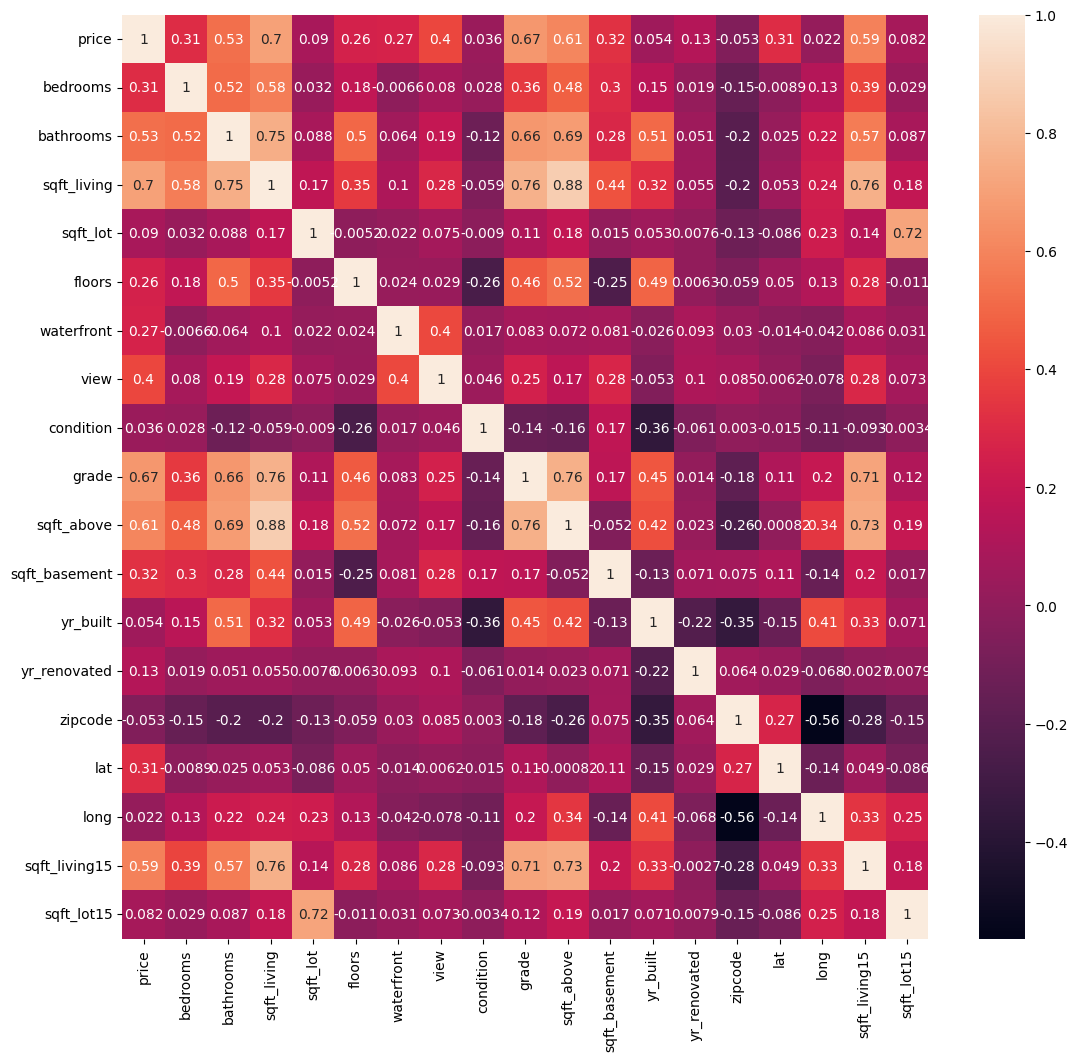

In [10]:
fig,ax=plt.subplots(figsize=(13,12))
ax=sns.heatmap(df.corr(),annot=True)

In [11]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [12]:
%matplotlib inline

In [15]:
df["basement"]=(df["sqft_basement"]>0).astype(int)
df["renovated"]=(df["yr_renovated"]>0).astype(int)


In [17]:
to_drop=["sqft_basement","yr_renovated"]
df.drop(to_drop,axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


In [19]:
cat_var=["waterfront","view","condition","grade","floors","zipcode"]
df=pd.get_dummies(df,columns=cat_var,drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1180,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2170,1951,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Train_Test_split
x=df.iloc[:,1:].values
x

array([[3.00e+00, 1.00e+00, 1.18e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 2.25e+00, 2.57e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.00e+00, 1.00e+00, 7.70e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.00e+00, 7.50e-01, 1.02e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 2.50e+00, 1.60e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.00e+00, 7.50e-01, 1.02e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [22]:
y=df.iloc[:,0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [24]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=5)
x_train.shape,y_train.shape

((16209, 106), (16209,))

In [28]:
from sklearn.linear_model import LinearRegression
from math import sqrt
multi_reg=LinearRegression()
multi_reg.fit(x_train,y_train)
pred=multi_reg.predict(x_test)
pred

array([423038.90075036, 176356.90154903, 420708.79322703, ...,
       465978.19511987, 754259.37197236, 873583.41128947])

In [31]:
# we will check for the accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=mean_squared_error(y_test,pred)
rmse

21689921273.344315

In [32]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
r2

0.8366403242152785

In [33]:
adj_r2=1-float(len(y)-1)/(len(y)-len(multi_reg.coef_)-1)*(1-r2)
adj_r2

0.8358351477234538